# Intersection theory on $\overline{\mathcal{M}}_{g,n}$ (using computers)

### Last week:
* Tuesday: introduction of the moduli space $\overline{\mathcal{M}}_{g,n}$ of stable curves
* Thursday: cohomology groups $H^*(\overline{\mathcal{M}}_{g,n})$ and the subset $RH^*(\overline{\mathcal{M}}_{g,n})$ of tautological classes

### Today:
How to do computations in $RH^*(\overline{\mathcal{M}}_{g,n})$ in practice : 
* lots of operations (cup product, intersection numbers, etc) have purely combinatorial description (good)
* the combinatorics is much too difficult to do by hand for large g and n (bad)
* we can use the help of computers (in the form of the SageMath package ``admcycles``) to do the combinatorics for us (good)


### How to get access to ``admcycles``
Website : [`https://gitlab.com/jo314schmitt/admcycles`](https://gitlab.com/jo314schmitt/admcycles)<br>
Online tool : [`https://cocalc.com`](https://cocalc.com) - currently slightly older version <br>
User manual : [`https://arxiv.org/abs/2002.01709`](https://arxiv.org/abs/2002.01709)

### Additional references for the tautological ring
* [`An introduction to the tautological ring and double ramification cycles`](http://fjanda.s3-website-us-east-1.amazonaws.com/taut.pdf) - Felix Janda (secret lecture notes, 13 pages)
* [`The moduli space of curves`](http://www.math.uni-bonn.de/~schmitt/ModCurves/Script.pdf) - Johannes Schmitt (non-secret lecture notes, 106 pages)


## The moduli space of stable curves

> **Definition/Theorem** (Deligne, Mumford - 1969)<br> 
Let $g,n \geq 0$ be integers (with $2g-2+n>0$).
$$\overline{\mathcal{M}}_{g,n} = \left\{(C,p_1, \ldots, p_n) \colon \begin{array}{l}
     {C \text{ compact complex algebraic}\\
     \text{curve of }\color{red}{\text{arithmetic}}\text{ genus }g \\
     \text{with at worst }\color{red}{\text{nodal singularities}}}\\
     {p_1, \ldots, p_n \in C \text{ distinct $\color{red}{\text{smooth}}$ points}}\\
     {\color{red}{\mathrm{Aut}(C,p_1, \ldots, p_n) \text{ finite}}}
\end{array} \right\}/\text{iso}$$
Then we have
- $\overline{\mathcal{M}}_{g,n}$ is a smooth, irreducible, compact complex orbifold/Deligne-Mumford stack of dimension $\dim_\mathbb{C} \overline{\mathcal{M}}_{g,n} = 3g-3+n$.
- The subset $\mathcal{M}_{g,n}$ where the curve $C$ is smooth is dense and open and the complement $\partial \overline{\mathcal{M}}_{g,n}$ is a normal-crossing divisor.

Below we illustrate the space $\overline{\mathcal{M}}_{1,2}$.

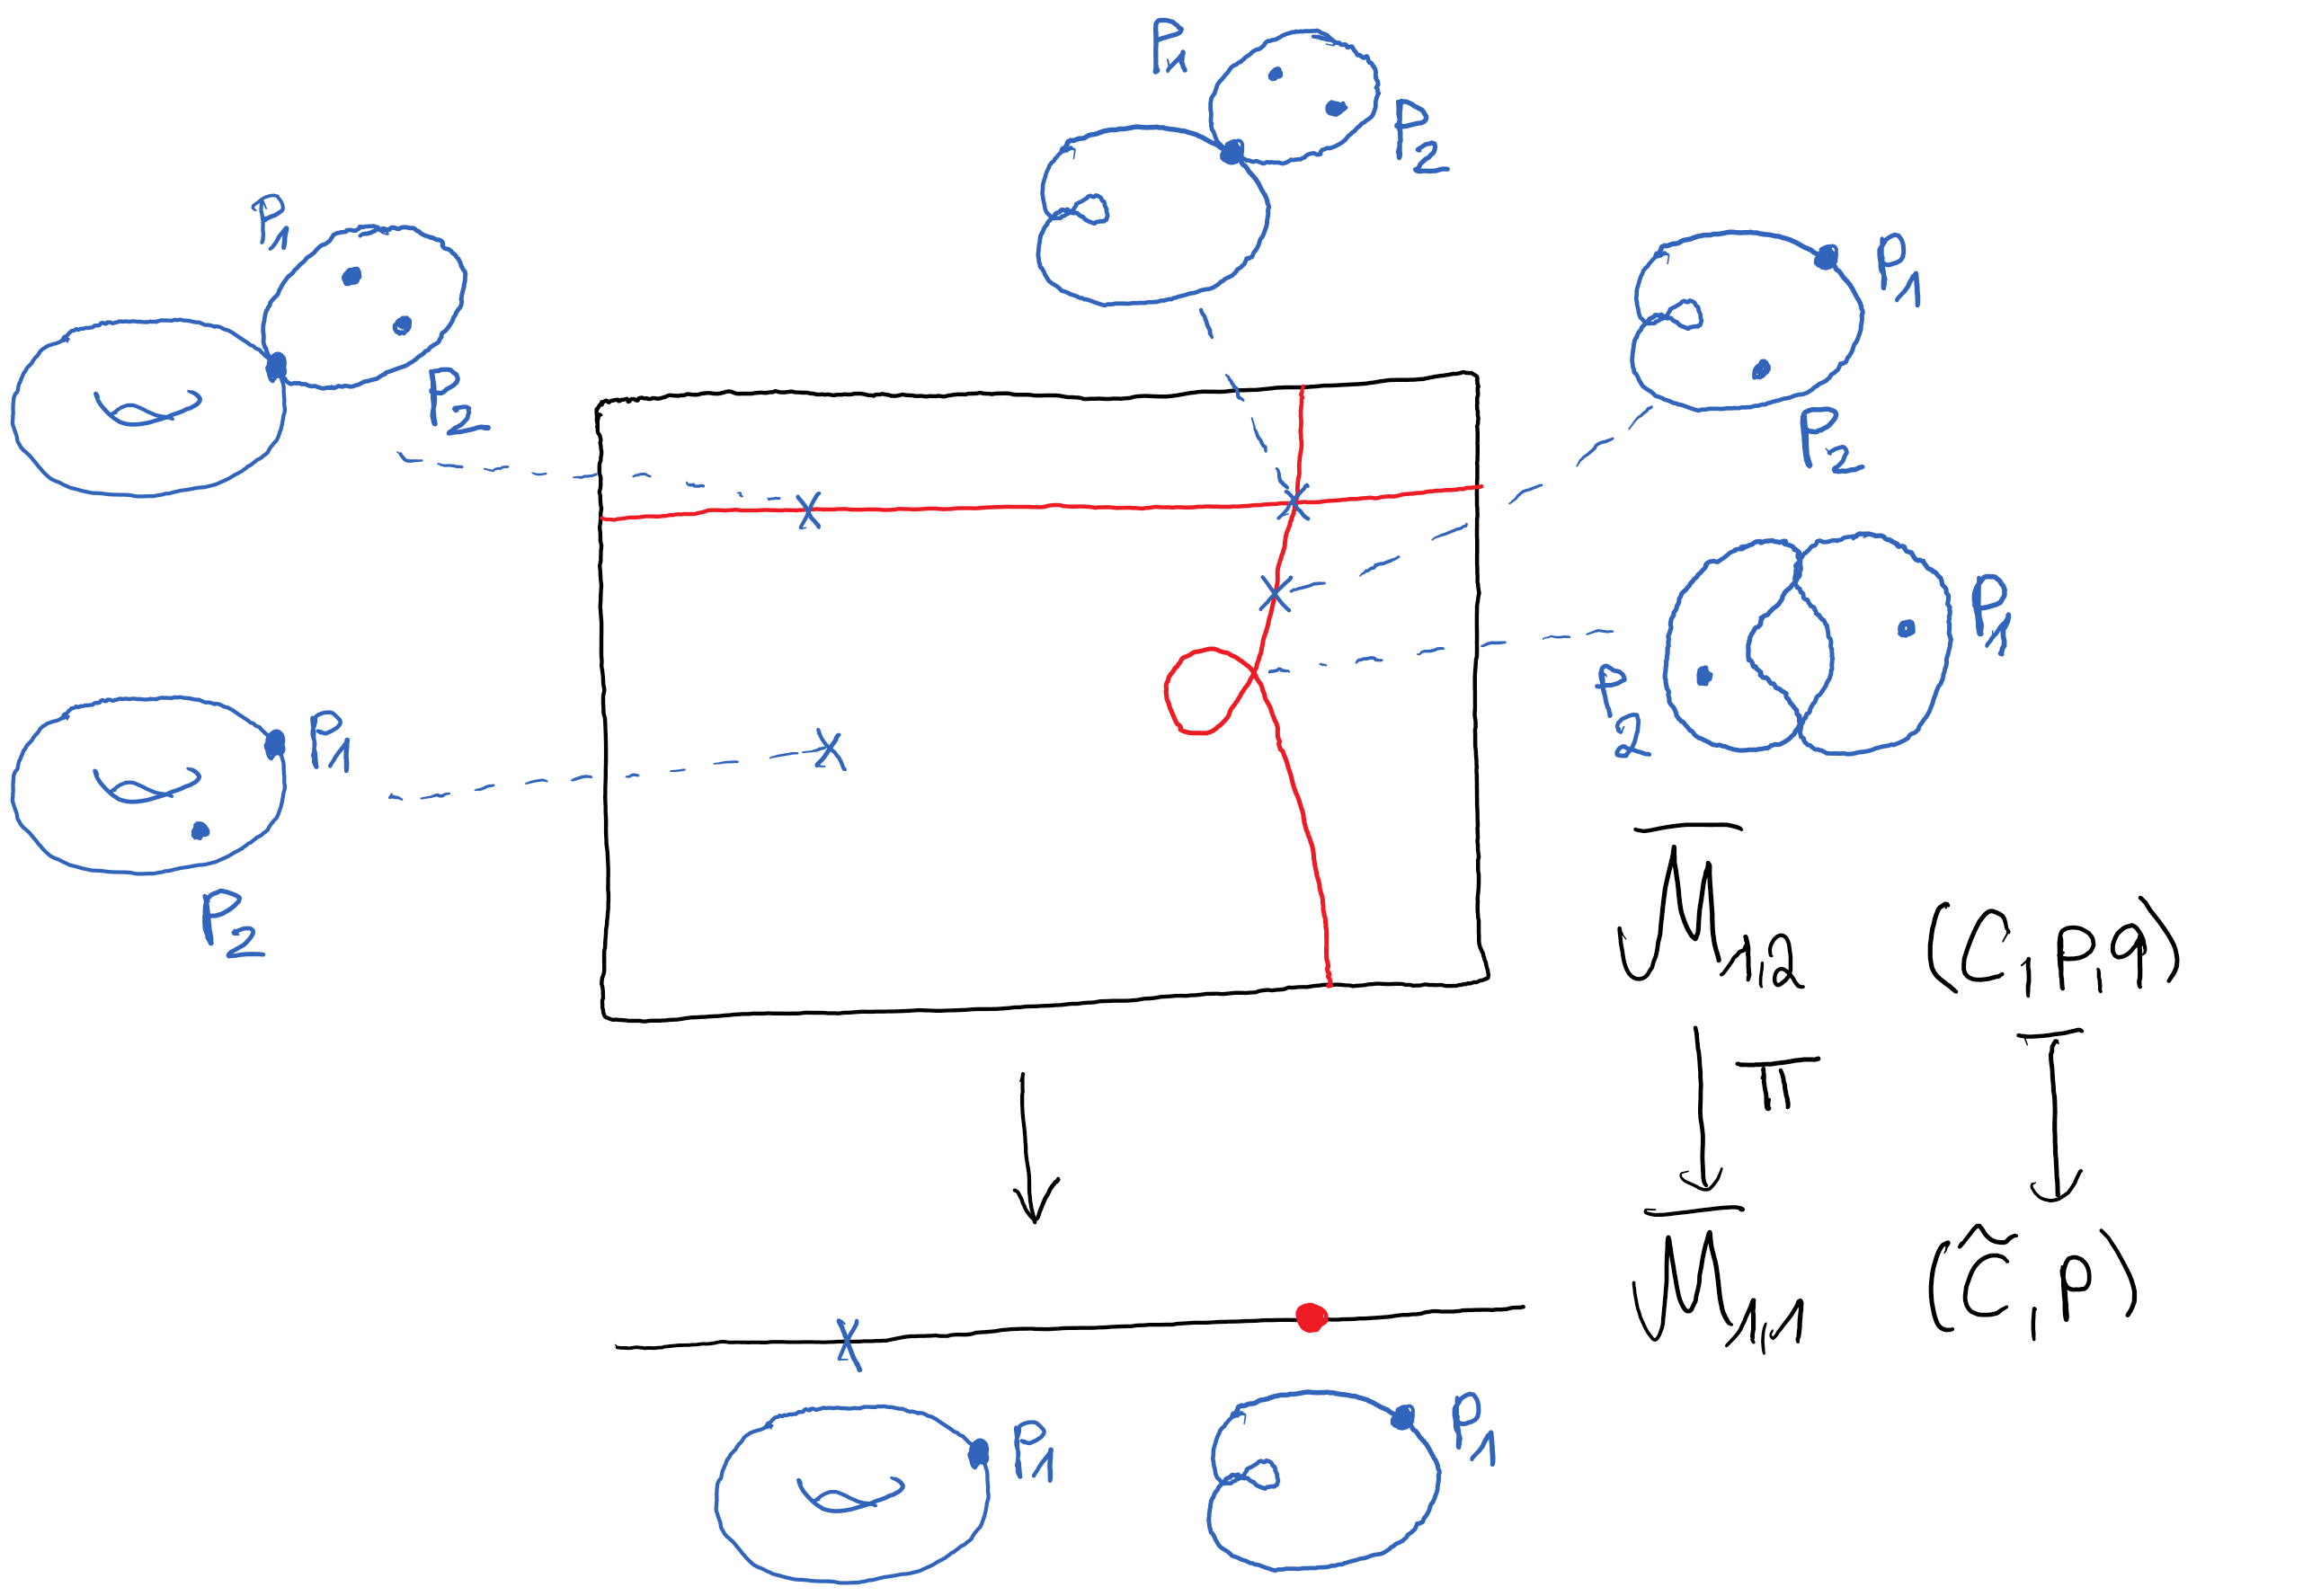

Instead of looking at the curves themselves, we can draw the corresponding dual (or stable) graphs.

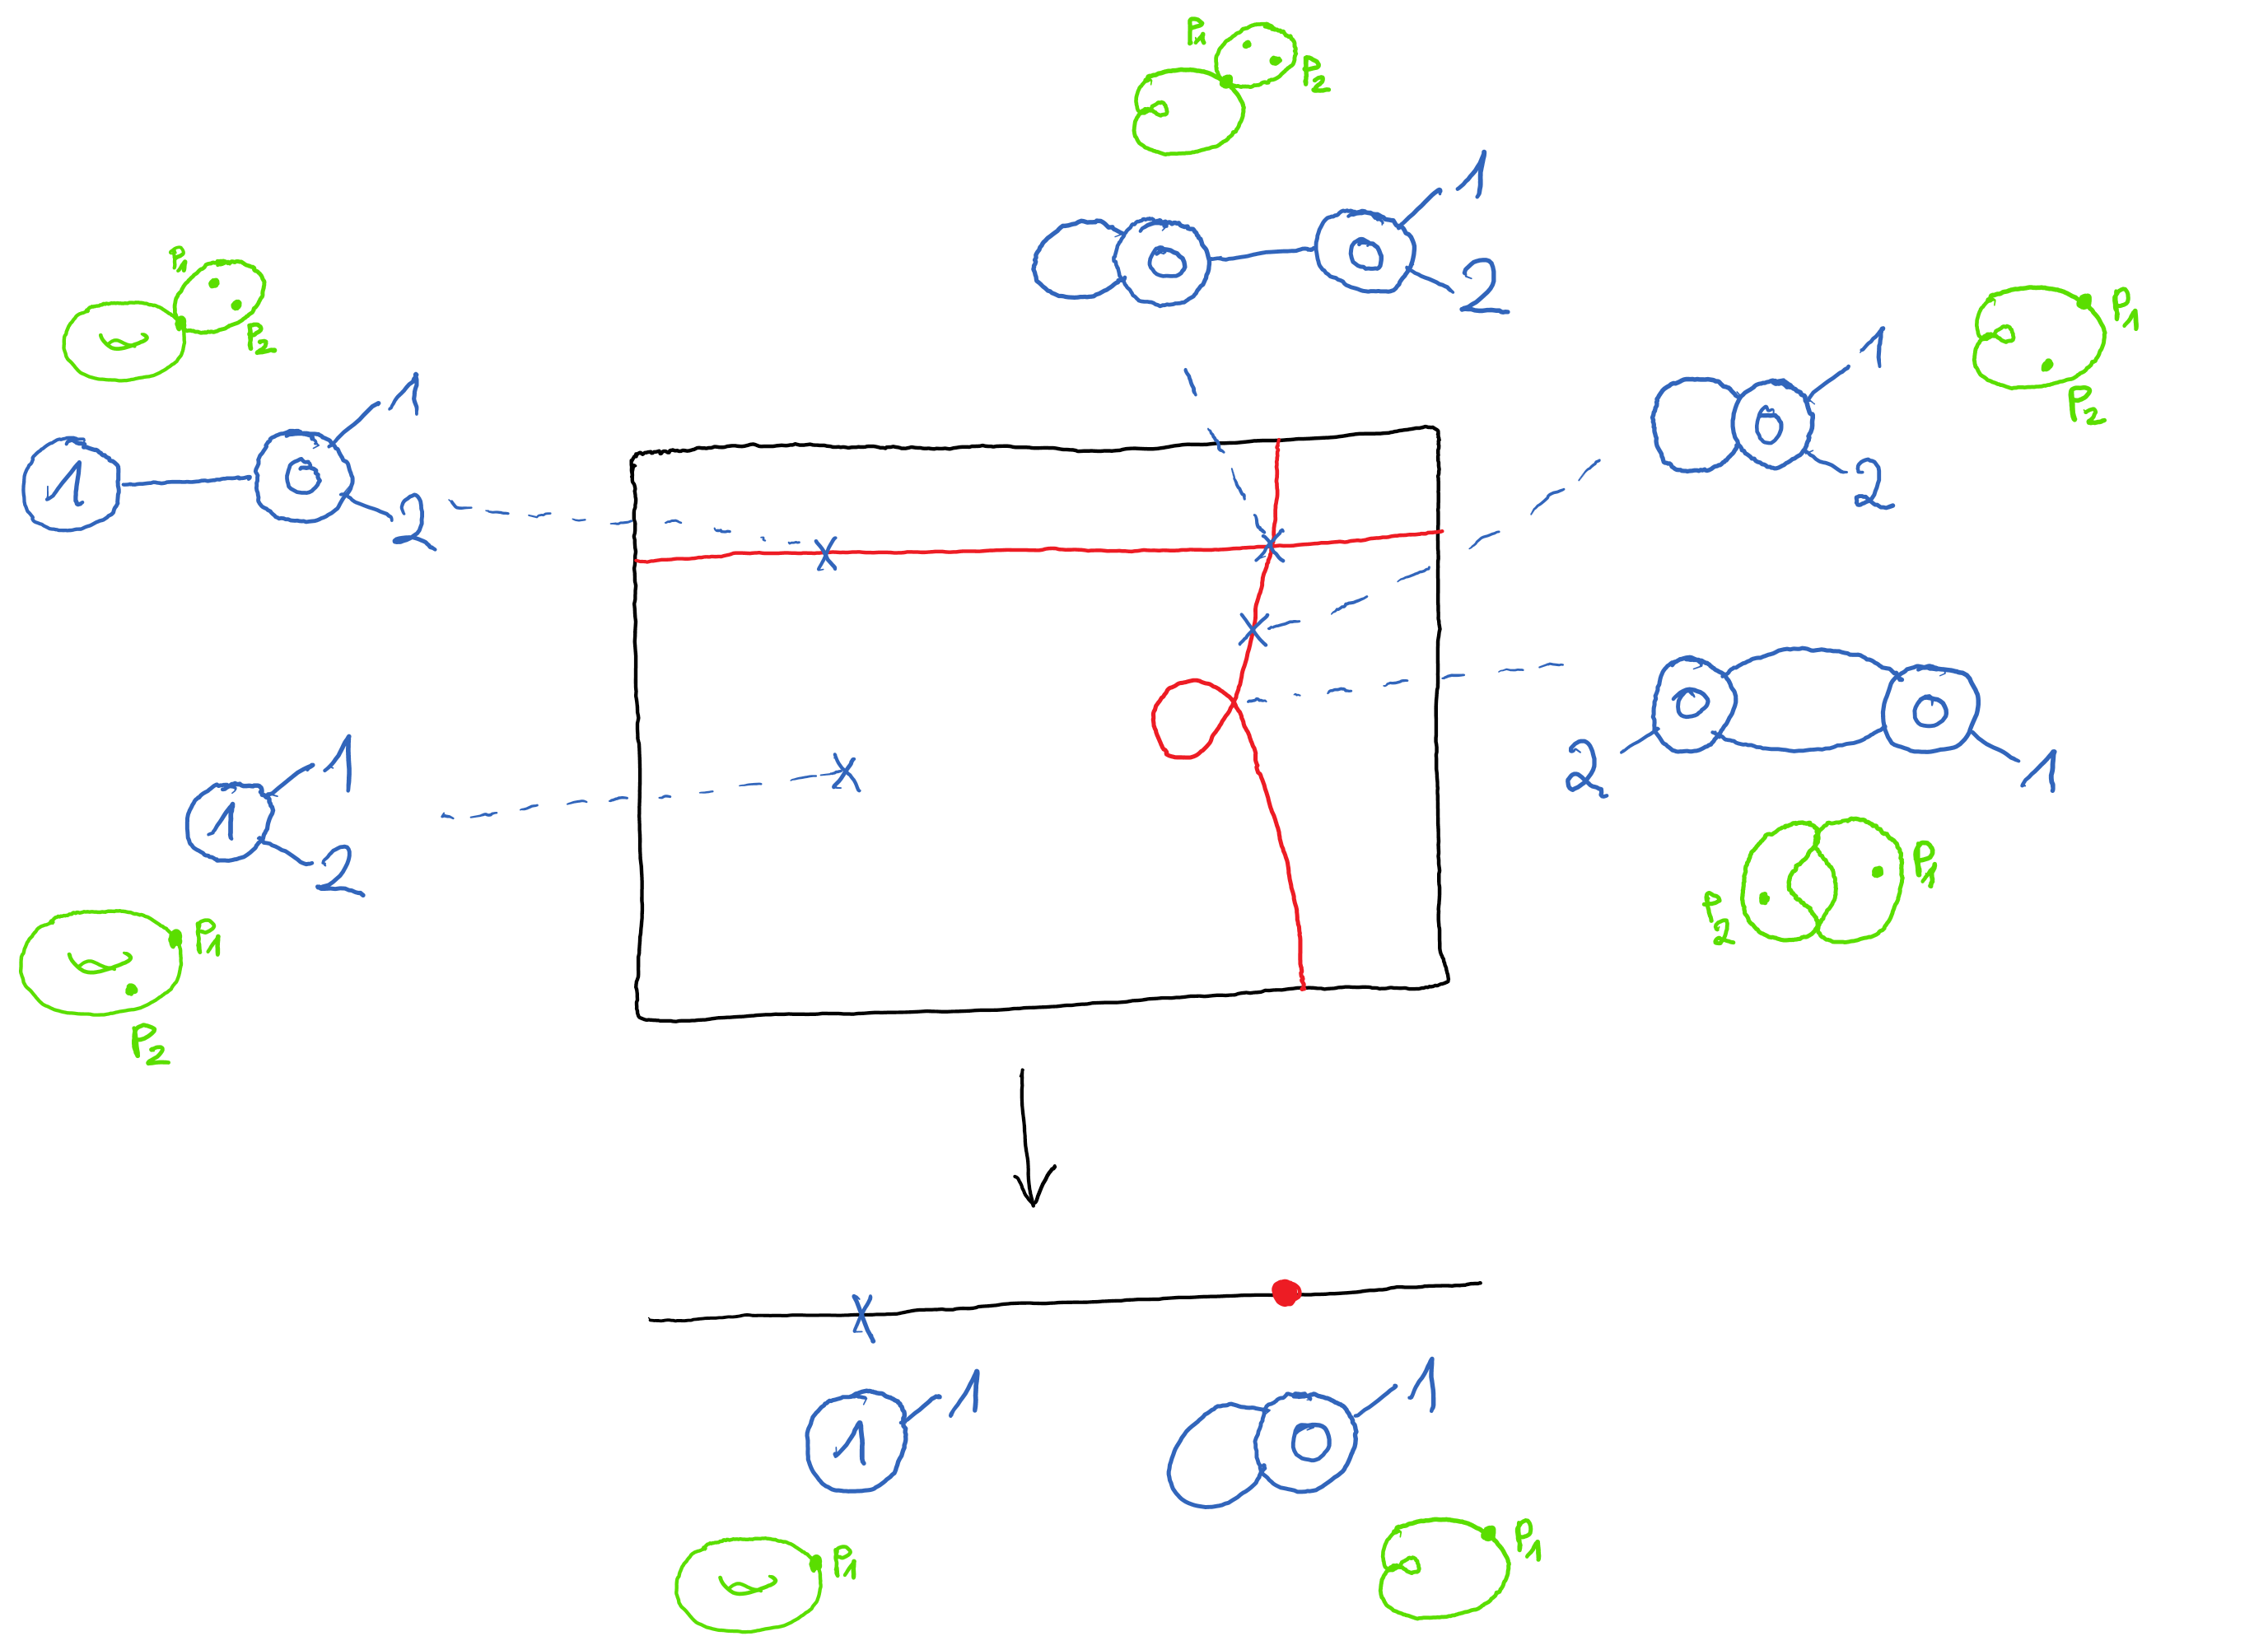

Let's start using ``admcycles`` to enumerate these stable graphs for us.

In [0]:
from admcycles import *
# list_strata(g,n,e) returns the list of stable graphs in Mbar_g,n with e edges
L = list_strata(1,2,1)
L

Let's see how to understand the output for the example ``[0, 1] [[1, 2, 3], [4]] [(3, 4)]``. Every stable graph is encoded with three lists:
* ``[0, 1]`` is a list of **genera** of the vertices,
* ``[[1, 2, 3], [4]]`` is a list of the **half-edges and legs** at the vertices,
* ``[(3, 4)]`` is a list of pairs of half-edges that are connected to form **edges**.
Therefore, the output ``[0, 1] [[1, 2, 3], [4]] [(3, 4)]`` encodes the following stable graph:
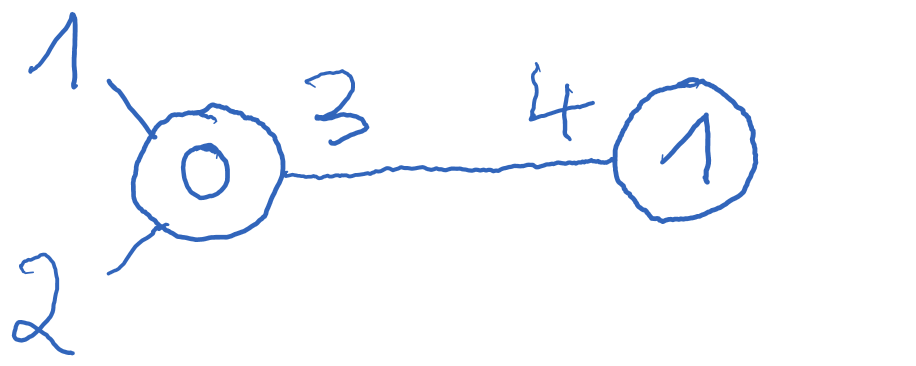

Using the command ``StableGraph(genera, legs, edges)`` we can create such a stable graph by hand, where ``genera``, ``legs`` and ``edges`` are the lists above (we'll see it further below).

### Exercise
Execute the cell above (which says ``from admcycles import * ...``) by clicking the grey box and then pressing ``Shift + Enter`` to start the computation.

Then, use the cell below to compute the stable graphs in $\overline{\mathcal{M}}_{1,2}$ with precisely 2 edges. Match them to the picture above.

>## Digression : the number of stable graphs
>### Exercise* (homework)
>Show that for any $\epsilon>0$, the number $T_n$ of isomorphism classes of stable graphs of genus $0$ with $n$ legs satisfies
>$$e^{(1/2-\epsilon)n \log n} \leq T_n \leq e^{(2+\epsilon) n \log n} \text{ for }n \gg 0\ ,$$
>where $\log$ is the natural logarithm. (*Hint*: Google "Cayley's formula")
>### Exercise** (homework)
>Let $T_{g,n}$ be the number of isomorphism classes of stable graphs of genus $g$ with $n$ legs. <br>
>Is it true that $\log T_{g,n} \in \theta((g+n) \log(g+n))$, i.e. that there exist $c,C>0$ such that
>$$e^{c (g+n) \log(g+n)} \leq T_{g,n} \leq e^{C (g+n) \log(g+n)} \text{ for } g+n \gg 0\ ?$$
>### Exercise (homework)
>Program the function ``T(g,n)`` in ``admcycles`` and crash this worksheet by computing ``T(2,6)``.

### Gluing morphisms
Assume we are given a stable graph $\Gamma$ like the following <br>
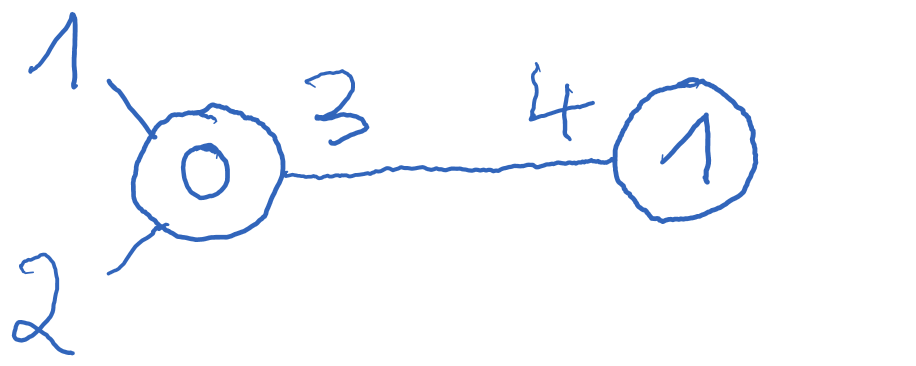 <br>
Then associated to $\Gamma$ we have a *gluing map*
$$\xi_\Gamma : \prod_{v \in V(\Gamma)} \overline{\mathcal{M}}_{g(v),n(v)} = \overline{\mathcal{M}}_{0,3} \times \overline{\mathcal{M}}_{1,1}\to \overline{\mathcal{M}}_{1,2}$$
<center>
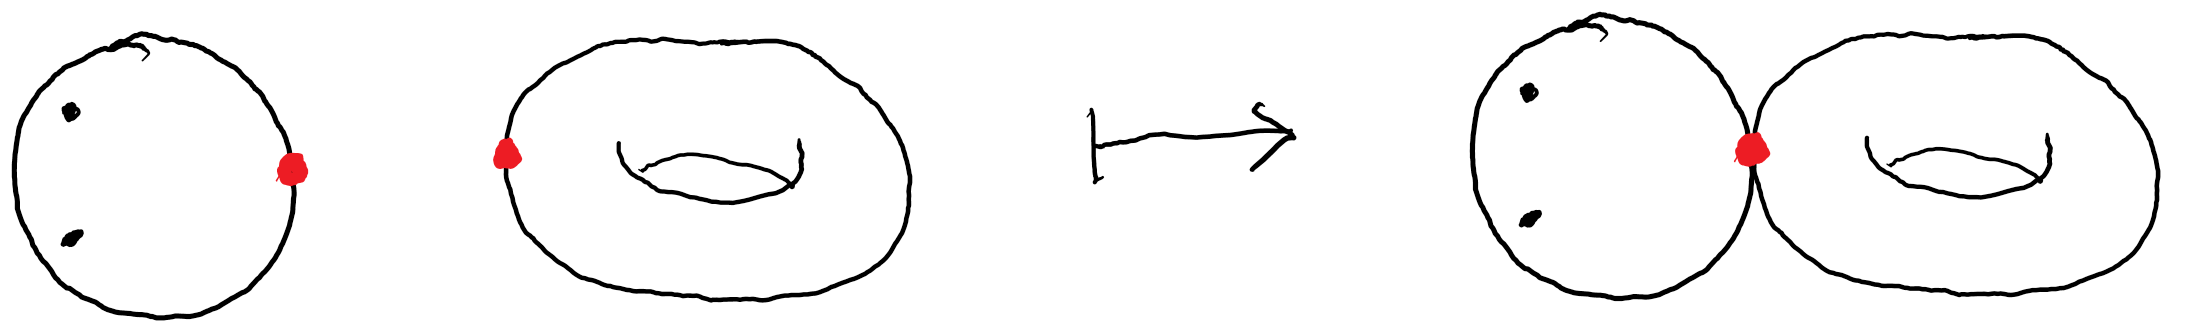
</center>

> **Proposition**<br> 
The map $\xi_\Gamma$ is finite with image equal to the closure $\overline{\mathcal{M}}^\Gamma$ of
$$\mathcal{M}^\Gamma = \{(C,p_1, \ldots, p_n) : \Gamma_{(C,p_1, \ldots, p_n)} = \Gamma\}$$

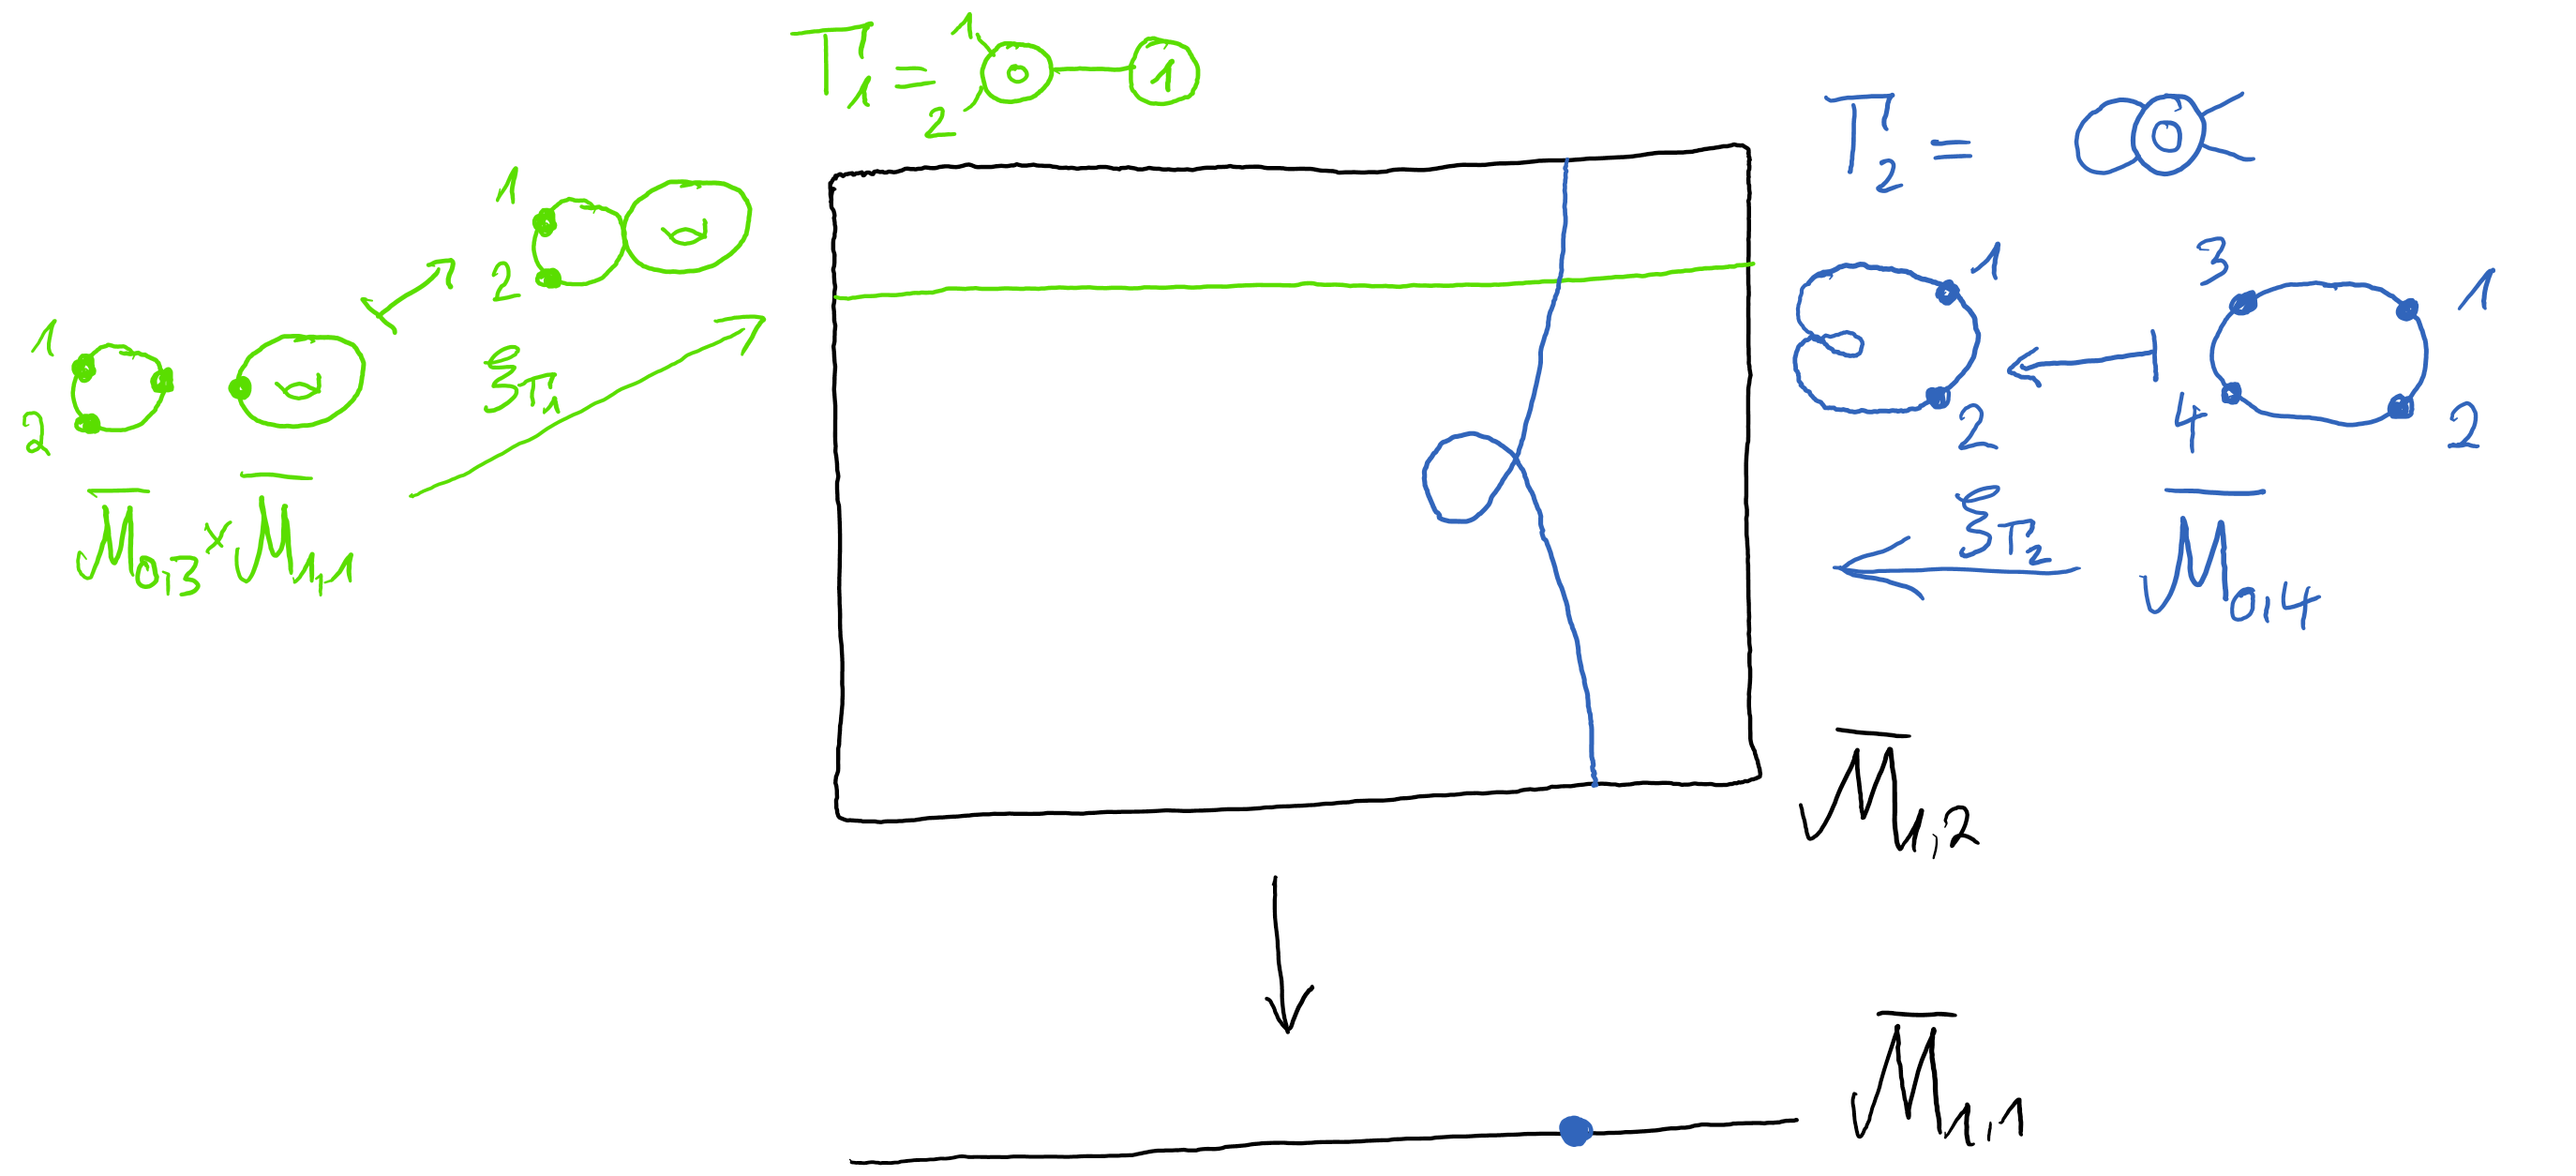

### The cohomology $H^*(\overline{\mathcal{M}}_{g,n})$ of $\overline{\mathcal{M}}_{g,n}$
$\overline{\mathcal{M}}_{g,n}$ compact space $\implies$ the singular cohomology $H^*(\overline{\mathcal{M}}_{g,n})$ is a finite-dimensional $\mathbb{Q}$-algebra

> **Definition** ($\psi$-classes)<br> 
$\mathbb{L}_i \to \overline{\mathcal{M}}_{g,n}$ complex line bundle, $\mathbb{L}_i|_{(C,p_1, \ldots, p_n)} = T_{p_i}^* C$
$$\psi_i = c_1(\mathbb{L}_i) \in H^2(\overline{\mathcal{M}}_{g,n}).$$

> **Definition** ($\kappa$-classes)<br> 
Forgetful morphism $\pi: \overline{\mathcal{M}}_{g,n+1} \to \overline{\mathcal{M}}_{g,n}, (C,p_1, \ldots, p_n, p_{n+1}) \mapsto (C,p_1, \ldots, p_n)$ [$C$ smooth]
$$\kappa_a = \pi_* \left( (\psi_{n+1})^{a+1}\right) \in H^{2a}(\overline{\mathcal{M}}_{g,n}).$$

> **Definition** (The tautological ring)<br> 
The tautological ring $RH^*(\overline{\mathcal{M}}_{g,n}) \subset H^*(\overline{\mathcal{M}}_{g,n})$ is spanned as a $\mathbb{Q}$-vector subspace by elements
$$[\Gamma,\alpha]=(\xi_\Gamma)_* \left(\underbrace{\text{product of }\kappa,\psi\text{-classes}}_{\alpha}\text{ on }\prod_{v \in V(\Gamma)} \overline{\mathcal{M}}_{g(v),n(v)} \right), $$
called *decorated strata classes*.

Let's start playing around with such tautological classes in ``admcycles``, in our favorite example of $\overline{\mathcal{M}}_{1,2}$. Looking back at the picture from above, there is something we should be able to verify:
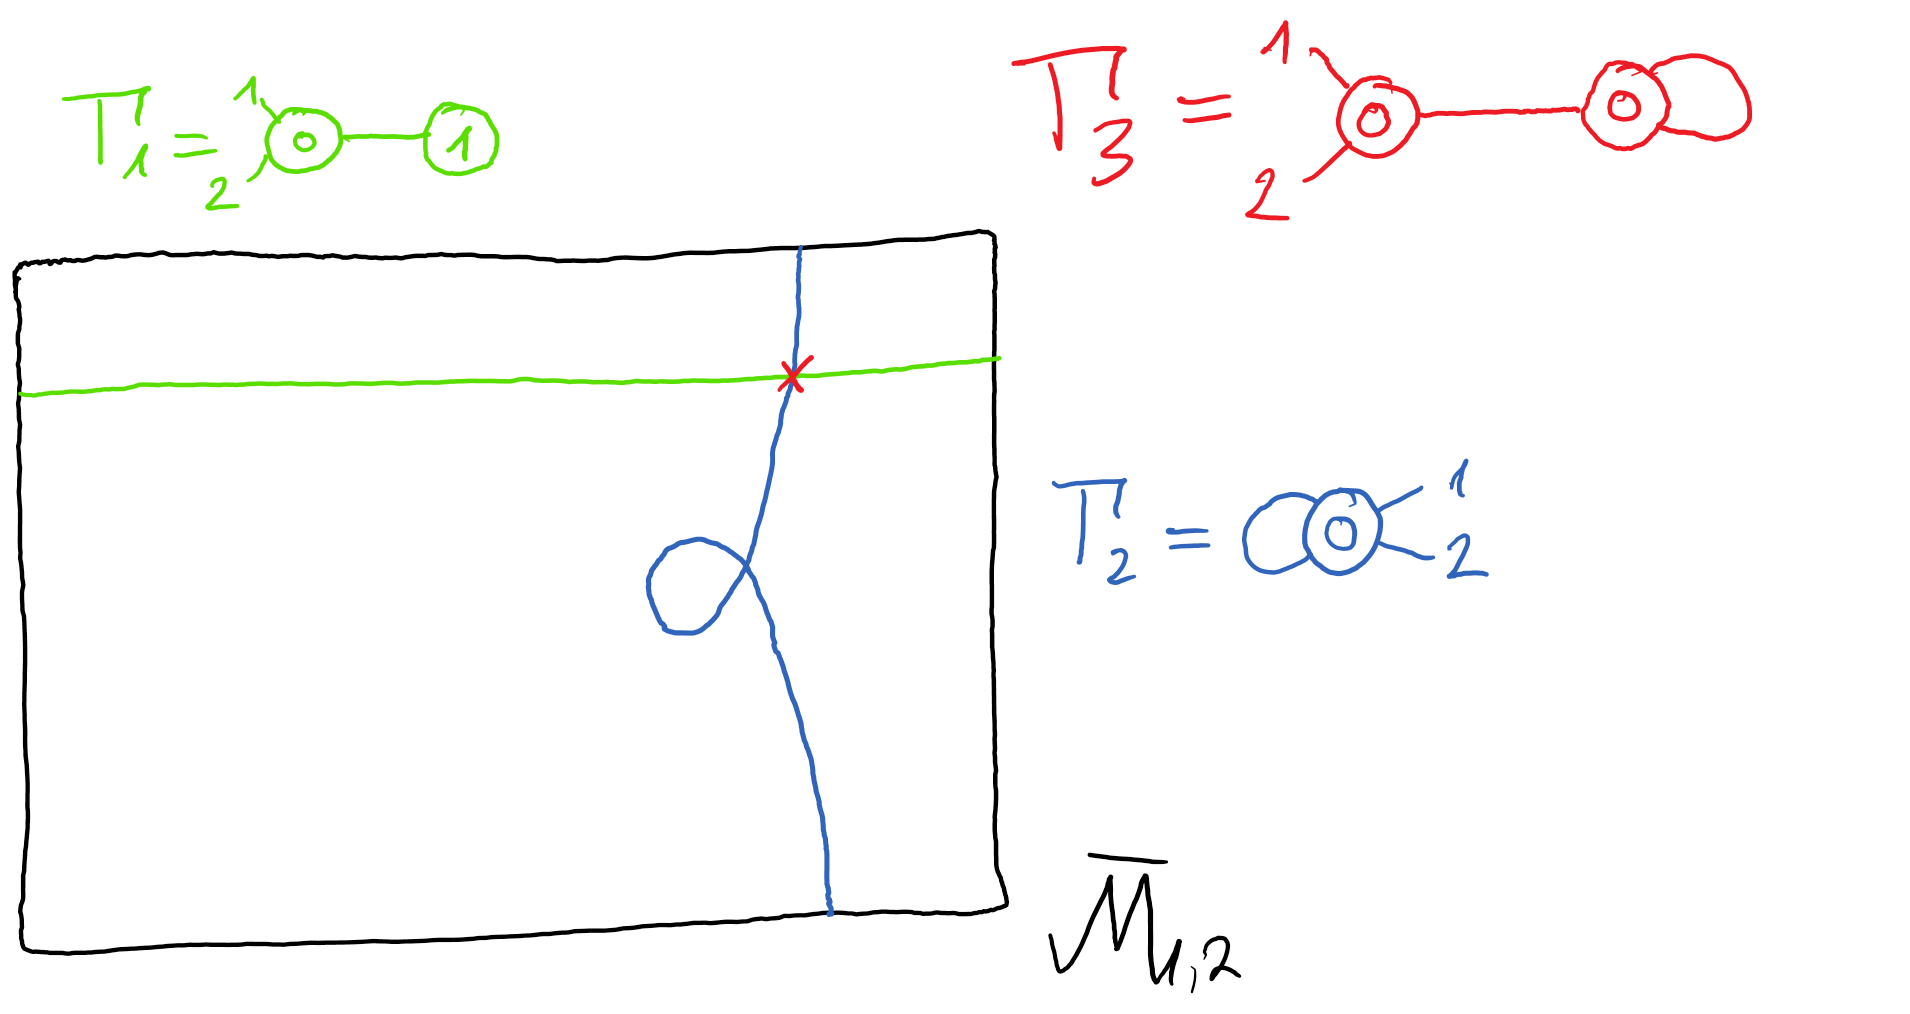

The classes $A = [\Gamma_1,1]$ and $B = [\Gamma_2,1]$ are supported on the green and blue boundary divisors. Their intersection product $A \cdot B$ should be supported on the red locus associated to the graph $\Gamma_3$.

In [0]:
Gamma1 = StableGraph([0, 1], [[1, 2, 3], [4]], [(3, 4)])
Gamma2 = StableGraph([0], [[1, 2, 3, 4]], [(3, 4)])
A = Gamma1.boundary_pushforward()
B = Gamma2.boundary_pushforward()
A*B

Looking back at the picture, we can see that this problem can be approached combinatorially: given stable graphs $\Gamma, \Gamma'$, the stratum $\overline{\mathcal{M}}^{\Gamma'}$ is contained in $\overline{\mathcal{M}}^{\Gamma}$ if and only if $\Gamma$ can be obtained from $\Gamma'$ by "contracting some edges". 

In our example, $\Gamma_3$ is the only graph such that we can obtain both $\Gamma_1$ and $\Gamma_2$ by contracting some edges. Thus (by basic intersection theory), the product $A \cdot B$ must be supported on $\overline{\mathcal{M}}^{\Gamma_3}$. But clearly, such combinatorics can be performed by computers.

This intuitive argument was made precise by Graber and Pandharipande, and extended to decorated strata classes $[\Gamma, \alpha]$.

> **Theorem** (Graber, Pandharipande - 2003)<br> 
The set of tautological classes $RH^*(\overline{\mathcal{M}}_{g,n})$ is closed under the intersection/cup product, and there exists an explicit formula
$$[\Gamma,\alpha] \cdot [\Gamma',\alpha'] = \sum \mu_i [\Gamma_i, \alpha_i]$$
with $\Gamma_i$ running over graphs which are simultaneous specializations of $\Gamma$ and $\Gamma'$.

Instead of giving you the full formula (see e.g. [`my lecture notes`](http://www.math.uni-bonn.de/~schmitt/ModCurves/Script.pdf#page=79) for the gory details), let's try it out in some examples.

### Exercise
The function ``psiclass(i,g,n)`` creates the class $\psi_i \in RH^2(\overline{\mathcal{M}}_{g,n})$. Use it in the cell below to compute $B \cdot \psi_1 = [\Gamma_2, 1] \cdot \psi_1$.

In [0]:
Gamma1 = StableGraph([0, 1], [[1, 2, 3], [4]], [(3, 4)])
Gamma2 = StableGraph([0], [[1, 2, 3, 4]], [(3, 4)])
A = Gamma1.boundary_pushforward()
B = Gamma2.boundary_pushforward()
# write code below


To do this calculation by hand, you would use the *projection formula* for the morphism $\xi_{\Gamma_2} : \overline{\mathcal{M}}_{0,4} \to \overline{\mathcal{M}}_{1,2}$:
$$[\Gamma_2, 1] \cdot \psi_1 = (\xi_{\Gamma_2})_*(1) \cdot \psi_1 = (\xi_{\Gamma_2})_*(1 \cdot (\xi_{\Gamma_2})^*\psi_1) = [\Gamma_2, \psi_1]\,. $$

Well, that was nice, but also a bit boring. Let's look at something more interesting, namely the intersection of the class $A \cdot A$:

In [0]:
A^2

When you intersect a class with itself (or more generally, if you intersect classes which meet in unexpectedly low codimension), you start seeing terms of the form $-\psi_h -\psi_{h'}$. These arise from the *excess intersection formula*. For a class like $A = (\xi_{\Gamma_1})_*(1)$ which is a pushforward under a closed, regular embedding 
$$\xi_{\Gamma_1} : \overline{\mathcal{M}}_{0,3} \times \overline{\mathcal{M}}_{1,1} \to \overline{\mathcal{M}}_{1,2}$$
of codimension $d=1$, it tells you that you get the pushforward
$$(\xi_{\Gamma_1})_*(1)^2 = (\xi_{\Gamma_1})_*(c_d(\mathcal{N}_{\xi_{\Gamma_1}})) $$
of the top Chern class of the *normal bundle* $\mathcal{N}_{\xi_{\Gamma_1}}$, and in the case above a short computation shows
$$c_1(\mathcal{N}_{\xi_{\Gamma_1}})= -\psi_h -\psi_{h'} \in H^2(\overline{\mathcal{M}}_{0,3} \times \overline{\mathcal{M}}_{1,1})\,.  $$

## Intersection numbers
Above we saw how to express products of classes $[\Gamma, \alpha]$ as linear combinations of $[\Gamma_i, \alpha_i]$. However, we can also compute actual intersection *numbers*. For this, given a tautological class ``t`` contained in $RH^{2(3g-3+n)}(\overline{\mathcal{M}}_{g,n})$, we can compute its degree
$$\int_{[\overline{\mathcal{M}}_{g,n}]} \mathrm{t} = \mathrm{deg}(\mathrm{t} \frown [\overline{\mathcal{M}}_{g,n}])$$
using ``t.evaluate()``. Let's start with a famous computation (that you'll see in class).

### Exercise
Use the cell below to compute the integral
$$\int_{[\overline{\mathcal{M}}_{1,1}]} \psi_1.$$

This is the first time that we really see that $\overline{\mathcal{M}}_{1,1}$ is a stack and not an algebraic variety. Otherwise, the intersection number would have to be an integer.

How does ``admcycles`` compute such integrals/intersection numbers? This is based on a conjecture [`Witten (1991)`](https://www.intlpress.com/site/pub/files/_fulltext/journals/sdg/1990/0001/0001/SDG-1990-0001-0001-a005.pdf), proved in [`Kontsevich (1992)`](https://projecteuclid.org/download/pdf_1/euclid.cmp/1104250524) (and explained beautifully in [`lecture notes`](http://mat.uab.es/~kock/GW/notes/psi-notes.pdf#page=26) by Joachim Kock). It boils down to a large set of recursive equations between the intersection numbers
$$\langle \tau_{k_1} \cdots \tau_{k_n} \rangle = \int_{[\overline{\mathcal{M}}_{g,n}]} \psi_1^{k_1} \cdots \psi_n^{k_n} $$
which can be seen to completely determine all of these numbers. This recursion was programmed by Aaron Pixton and integrated into ``admcycles``.

What about integrals involving $\kappa$-classes? Using that such classes are pushforwards of $\psi$-classes under forgetful maps, such integrals can be converted into (linear combinations of) integrals involving only $\psi$-classes on spaces with more markings:
$$\int_{[\overline{\mathcal{M}}_{1,1}]} \kappa_1 = \int_{[\overline{\mathcal{M}}_{1,1}]} \pi_* \psi_2^2 = \int_{[\overline{\mathcal{M}}_{1,2}]} \psi_2^2\,.$$

Finally, integrals over arbitrary decorated stratum classes $[\Gamma, \alpha]$ are just given by products of integrals of $\kappa$ and $\psi$-classes from each of the vertices:

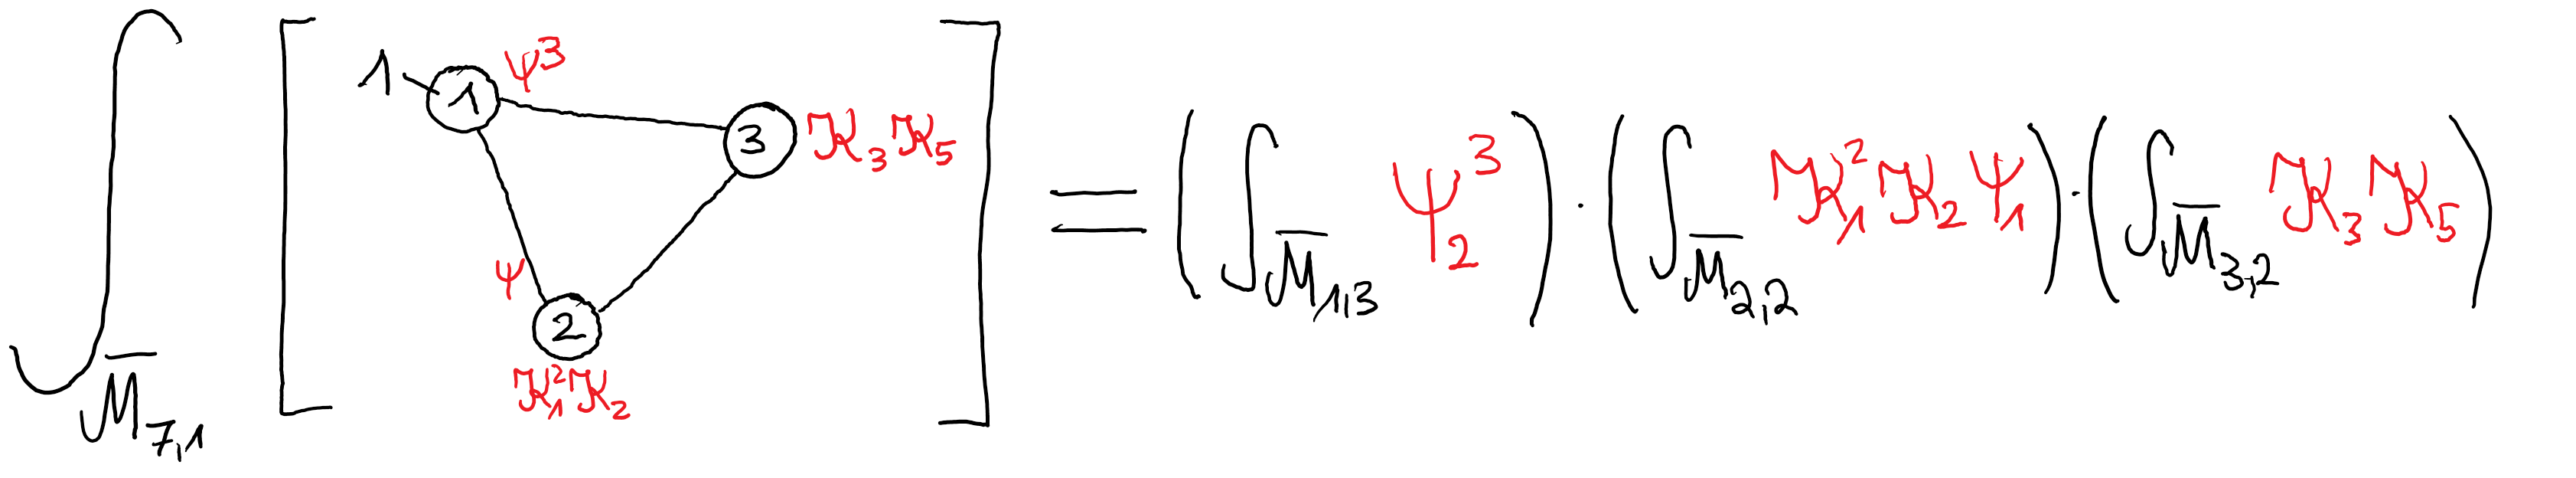

## Tautological relations
An important aspect of the tautological ring is that the generators $[\Gamma, \alpha]$ are not necessarily linearly independent. A linear relation between them is called a *tautological relation*. A lot of work has gone into studying such relations (Faber, Zagier - 2000; Pandharipande, Pixton - 2010; Pixton - 2012; Pandharipande, Pixton, Zvonkine - 2013), finally leading to a conjectural description of all tautological relations, originally proposed by Pixton.

These so-called generalized Faber-Zagier relations $R^{\text{FZ}}$ have been implemented by Pixton in the predecessor of ``admcycles`` and are accessible in ``admcycles`` in two ways: given a tautological class ``t`` in $RH^{2d}(\overline{\mathcal{M}}_{g,n})$ you can

- check if it is contained in the system $R^{\text{FZ}}$ (and thus zero) by calling ``t.is_zero()``,
- express it in a basis of the vector space $$\mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}},$$ which is conjecturally isomorphic to $RH^{2d}(\overline{\mathcal{M}}_{g,n})$, by calling ``t.toTautbasis()``.

### Exercise
There exists a linear relation between the classes
$$\kappa_1,\, \psi = \psi_1 + \psi_2,\, A = [\Gamma_1, 1] \in RH^2(\overline{\mathcal{M}}_{1,2})\,.$$
Find the relation using the function ``toTautbasis()`` and confirm it using ``is_zero``.

*Note*: This task may require more than one command. You can create new cells for computations via the menu ``Insert->Insert Cell Above/Below`` at the top of the screen.

In [0]:
kappa = kappaclass(1,1,2)  # kappaclass(a,g,n) computes kappa_a on Mbar_{g,n}
psi = psiclass(1,1,2) + psiclass(2,1,2)
A = StableGraph([0,1],[[1,2,3],[4]],[(3,4)]).boundary_pushforward()

The functions ``toTautbasis`` and ``is_zero`` are perfectly fine for *confirming* that classes are zero, since ``R.is_zero() == True`` means that ``R`` is a combination of known tautological relations, and thus indeed vanishes.

But what if we want to show that things *don't* vanish? Since the generalized Faber-Zagier relations are only *conjecturally* complete, an output ``R.is_zero() == False`` just tells us that ``R`` is not zero *assuming the conjecture*. 

To get a non-conditional result, i.e how to show that in the exact sequence
$$0 \to K \to \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} \to RH^{2d}(\overline{\mathcal{M}}_{g,n}) \to 0 \quad (*)$$
the kernel $K$ vanishes (and thus that $R^{\text{FZ}}$ indeed give all relations)? We can use the following strategy: there exists an intersection pairing
\begin{align*}
RH^{2d}(\overline{\mathcal{M}}_{g,n}) \otimes RH^{2(3g-3+n-d)}(\overline{\mathcal{M}}_{g,n}) &\to \mathbb{Q},\\
[\Gamma_1, \alpha_1] \otimes [\Gamma_2, \alpha_2] &\mapsto \int_{[\overline{\mathcal{M}}_{g,n}]} [\Gamma_1, \alpha_1] \cdot [\Gamma_2, \alpha_2]\,.
\end{align*}

As we have seen in the last sections, we can explicitly compute all pairings appearing above using ``admcycles`` and obtain a matrix $M$ whose entries are 
$$ M_{[\Gamma_1, \alpha_1], [\Gamma_2, \alpha_2]}  = \int_{[\overline{\mathcal{M}}_{g,n}]} [\Gamma_1, \alpha_1] \cdot [\Gamma_2, \alpha_2]\,,$$
and this matrix satisfies
$$\mathrm{rank}\, M \leq \dim  RH^{2d}(\overline{\mathcal{M}}_{g,n}).$$
Then if we check
$$\mathrm{rank}\, M = \dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}}$$
it follows that in $(*)$ indeed the kernel $K$ must vanish.

### Example : $RH^2(\overline{\mathcal{M}}_{1,2})$
Let's see this in practice: for the classes in $RH^2(\overline{\mathcal{M}}_{1,2})$ considered above, we saw that ``toTautbasis()`` gave out vectors of length $2$, so
$$\dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} = 2 $$
in this case. Since $3g-3+n = 2$ in this case, the relevant pairing is

$$RH^{2}(\overline{\mathcal{M}}_{g,n}) \otimes RH^{2}(\overline{\mathcal{M}}_{g,n}) \to \mathbb{Q}\,.$$

Let's compute the matrix $M$ and its rank:

In [0]:
D = tautgens(1,2,1)  # tautgens(g,n,d) lists of all generators [Gamma_i, alpha_i] in RH^{2d}(Mbar_{g,n})
pairings = [[(a*b).evaluate() for a in D] for b in D]
M = matrix(QQ, pairings)
M

In [0]:
M.rank()

So indeed we get the equality
$$\mathrm{rank}\, M = \dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} = 2$$
and thus we can be sure that the system $R^{\text{FZ}}$ is complete in this case.

## Application (ongoing research with R. Pandharipande, S. Molcho)
On $\overline{\mathcal{M}}_{g,n}$ there exists a vector bundle $\mathbb{E}_g$, called the *Hodge bundle*, with fibres
$$\mathbb{E}_g|_{(C,p_1, \ldots, p_n)} = H^0(C, \omega_C).$$
The Chern classes
$$\lambda_i = c_i(\mathbb{E}_g) \in H^{2i}(\overline{\mathcal{M}}_{g,n})$$
are called the *$\lambda$-classes*. They are tautological, with an explicit formula first computed by Mumford, and can be computed in terms of generators $[\Gamma, \alpha]$ using ``lambdaclass(i,g,n)``.

The formula following by Mumford's computation is reasonably nice, but it does feature some slightly complicated terms. However, we could hope for something better! Consider the open subset $\mathcal{M}_{g,n}^{\mathrm{ct}}$ of curves $(C,p_1, \ldots, p_n)$ such that the stable graph of $C$ is a tree (i.e. contains no circular path). Then there exists a class $\theta \in RH^2(\overline{\mathcal{M}}_{g,n})$ such that
$$\lambda_g = \frac{1}{g!} \theta^g \in H^{2g}(\mathcal{M}_{g,n}^{\mathrm{ct}})\,. $$
So, up to a scalar factor, the class $\lambda_g$ is a power of a divisor class! However, it turns out that this equality does *not* hold in general on the whole of $\overline{\mathcal{M}}_{g,n}$.

What we can show now is that such a formula *cannot work at all* if $g$ is sufficiently large! To be slightly more precise, denote by
$$RH^*_{\leq k}(\overline{\mathcal{M}}_{g,n}) \subseteq RH^*(\overline{\mathcal{M}}_{g,n}) $$
the sub-$\mathbb{Q}$-*algebra* of $RH^*(\overline{\mathcal{M}}_{g,n})$ generated by elements of cohomological degree at most $2k$. In particular, $RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$ is the set of classes which can be written as linear combinations of products of divisor classes.

Then we have the following:
> **Theorem** (Molcho, S, Pandharipande - last Friday)<br> 
For $g \geq 4$ we have
$$\lambda_g \notin RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$$
and for $g \geq 5$ we have
$$\lambda_g \notin RH^*_{\leq 2}(\overline{\mathcal{M}}_{g,n})\, ,$$
*assuming* that the generalized Faber-Zagier relations $R^{\text{FZ}}$ give all the relations in the spaces
$$RH^{8}(\overline{\mathcal{M}}_{4,1}) \ \text{ and }\ RH^{10}(\overline{\mathcal{M}}_{5,1}).$$
**Idea of proof**
Use ``admcycles`` to check the statement in $\overline{\mathcal{M}}_{4,1}$ and $\overline{\mathcal{M}}_{5,1}$. The assumption tells us that in the corresponding spaces ``toTautbasis()`` really *does* express $\lambda_g$ as well as elements of $RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$ in a basis of $RH^*(\overline{\mathcal{M}}_{g,n})$, so the statement is just linear algebra. The case of larger $g,n$ can then be shown using a small argument applying boundary gluing maps like
$$\xi : \overline{\mathcal{M}}_{5,1} \times \overline{\mathcal{M}}_{1,2} \to \overline{\mathcal{M}}_{6,1}\,, $$
using the fact that $\xi^* \lambda_6 = \lambda_5 \otimes \lambda_1$.

With the strategy discussed before, we can hopefully get rid of the assumption of the Faber-Zagier relations. The only problem is that the expected dimension of $RH^{10}(\overline{\mathcal{M}}_{5,1})$ is $1371$, so the matrix $M$ we have to compute is a matrix of size at least $1371 \times 1371$ of intersection numbers on the space $\overline{\mathcal{M}}_{5,1}$ of complex dimension $13$. This will take a bit of time and effort, but doesn't seem impossible.<br><br>

<center><font size="+2"><b>Thanks for your attention!</b></font></center> 

<br><br><br><br><br><br><br><br><br><br>
# Appendix

## Functoriality under forgetful maps
A nice feature of the tautological ring is that it is closed under pushforwards and pullbacks by forgetful maps $\pi: \overline{\mathcal{M}}_{g,n+1} \to \overline{\mathcal{M}}_{g,n}$. Let's try it out:

In [0]:
P = psiclass(2,1,2)^2           # psi_2^2 on Mbar_{1,2}
P.forgetful_pushforward([2])    # pushforward of P under pi : Mbar_{1,2} -> Mbar_{1,1} forgetting marking 2

### Exercise
Let $\Gamma_0$ be the stable graph of the boundary point of $\overline{\mathcal{M}}_{1,1}$. Compute the pullback of $[\Gamma_0, 1]$ under the forgetful map $\pi: \overline{\mathcal{M}}_{1,2} \to \overline{\mathcal{M}}_{1,1}$. For this, use that if ``T`` is a tautological class, the pullback of ``T`` under a forgetful map of markings ``[m1,...,mk]`` is computed by ``T.forgetful_pullback([m1,...,mk])``.

### Exercise
Verify one of the most important tautological relations, called the *WDVV-relation* on the space $\overline{\mathcal{M}}_{0,4}$:

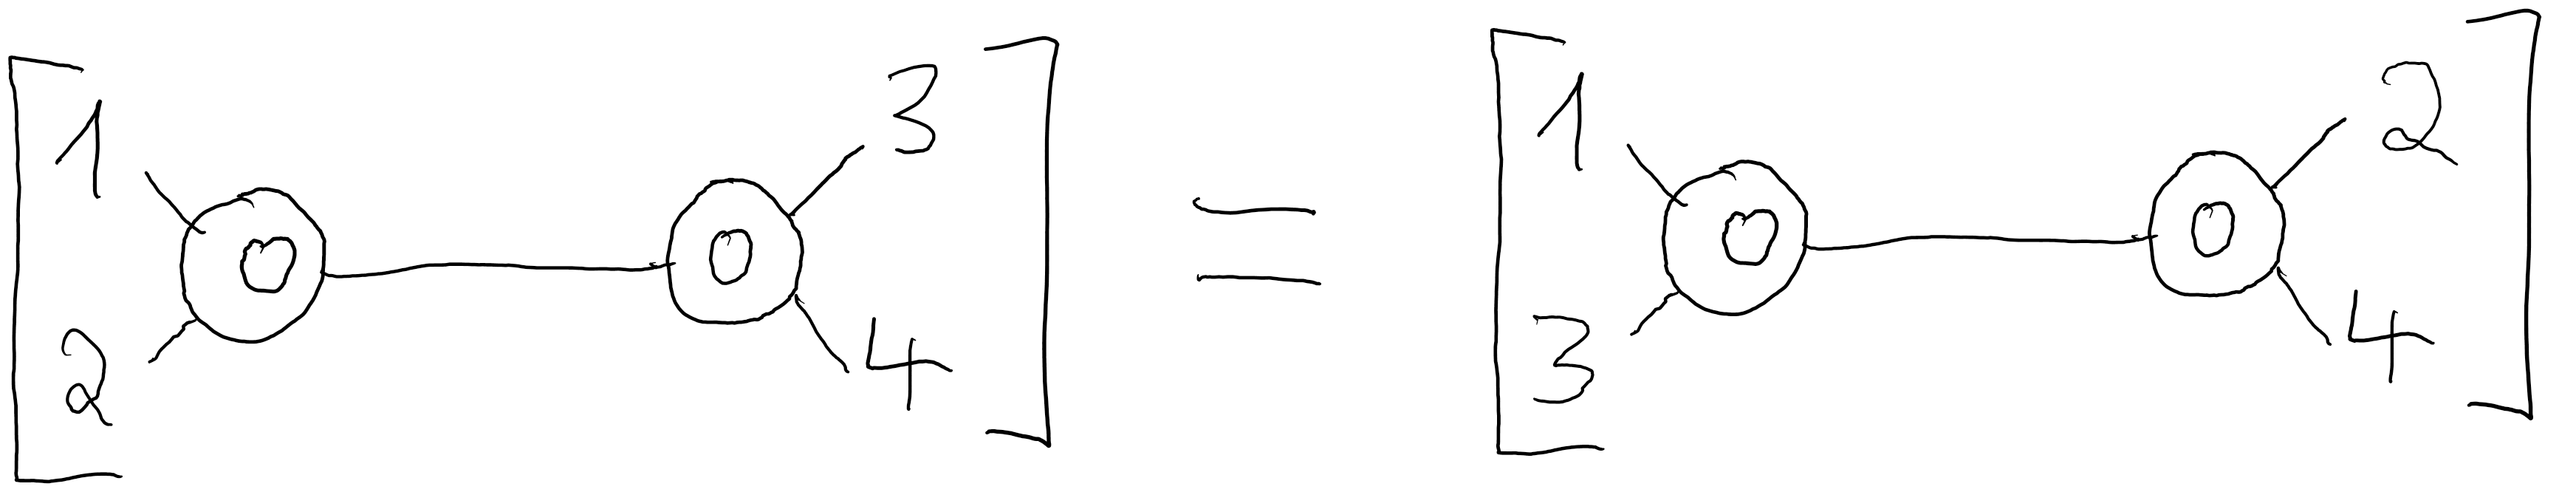

## Natural cycle classes on the moduli space of stable curves
Using the fact that $\overline{\mathcal{M}}_{g,n}$ is a moduli space, there are many ways to construct interesting cohomology classes on it. Many (though not all) of them actually result in tautological classes, and again many (though not all) of these have been implemented in ``admcycles``.

### A) Lambda classes (and generalizations)
On $\overline{\mathcal{M}}_{g,n}$ there exists a vector bundle $\mathbb{E}_g$, called the *Hodge bundle*, with fibres
$$\mathbb{E}_g|_{(C,p_1, \ldots, p_n)} = H^0(C, \omega_C).$$
The Chern classes
$$\lambda_i = c_i(\mathbb{E}_g) \in H^{2i}(\overline{\mathcal{M}}_{g,n})$$
are called the *$\lambda$-classes*. They are tautological, with an explicit formula first computed by Mumford, and can be computed in terms of generators $[\Gamma, \alpha]$ using ``lambdaclass(i,g,n)``.

### Exercise
A special case of the main result of [Faber, Pandharipande - 1998] is that the generating series
$$F(t) = 1 + \sum_{g > 0} t^{2g} \int_{\overline{\mathcal{M}}_{g,1}} \psi_1^{2g-2} \lambda_g$$
is given by
$$F(t) = \frac{t/2}{\sin(t/2)}.$$
Check their result for $g=2$.

*Hint*: To get you started, I compute the expansion of $F$ at $t=0$ below.

In [0]:
R.<t> = PowerSeriesRing(QQ)
F = (t/2)/sin(t/2); F

In [0]:
(psiclass(1,2,1)^2 * lambdaclass(2,2,1)).evaluate()

Note that for the universal curve $\pi : \overline{\mathcal{C}}_{g,n} \to \overline{\mathcal{M}}_{g,n}$ and the relative dualizing line bundle $\omega_\pi$ of this morphism, we have
$$\mathbb{E}_g = R^0 \pi_* \omega_\pi.$$
The paper [Pagani, Ricolfi, van Zelm - 2019] generalizes the $\lambda$-classes and computes, for an *arbitrary* line bundle $\mathcal{L}$ on $\overline{\mathcal{C}}_{g,n}$ the Chern classes 
$$c_i(R^\bullet \pi_* \mathcal{L})$$
of the derived pushforward of $\mathcal{L}$ by $\pi$. In fact, ``admcycles`` had a hand in this: the original version [Pagani, Ricolfi - 2018] of the paper missed some terms in the computation, which was discovered by van Zelm using ``admcycles``.

### B) Admissible cover cycles
For $S \subset \overline{\mathcal{M}}_{g,n}$ a closed, algebraic subset of $\mathbb{C}$-codimension $d$, there exists a fundamental class
    $$[S] \in H_{\dim - 2d}(\overline{\mathcal{M}}_{g,n}) \cong H^{\dim - 2d}(\overline{\mathcal{M}}_{g,n})^\vee \underset{\mathrm{PD}}{\cong} H^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where $\mathrm{PD}$ is the isomorphism from *Poincaré duality*.


In joint work with Jason van Zelm, we studied admissible cover cycles - fundamental classes of loci of curves $(C,p_1, \ldots, p_r)$ in $\overline{\mathcal{M}}_{g,r}$ admitting finite covers $C \to D$ to some curve $D$ of genus $g'\leq g$ such that $p_1, \ldots, p_r$ are ramification points of the cover.

An important special case are the loci of *hyperelliptic curves*

\begin{equation*}
\mathrm{Hyp}_{g,n,2m} = \left\{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : \begin{array}{c} C \text{ hyperelliptic},\\p_i\text{ Weierstrass points},\\ q_j, q_j' \text{ hyperelliptic conjugate}\end{array} \right\} \subset \mathcal{M}_{g,n+2m}
\end{equation*}

Then, [Faber, Pandharipande - 2013] showed that the fundamental classes of the closures

\begin{align*}
[\overline{\mathrm{Hyp}}_{g,n,2m}] \in H^*(\overline{\mathcal{M}}_{g,n+2m}),
\end{align*}

are always tautological, and [in many cases](https://arxiv.org/pdf/1808.05817.pdf#figure.1), the package `admcycles` can compute them via the function `Hyperell(g,n,m)`.

### C) Strata of differentials
Given $\textbf{a}=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = 2g-2$, we consider the locus
\begin{align*}
\mathcal{H}_g(\textbf{a}) &= \left \{(C,p_1, \ldots, p_n) : \omega_C \cong \mathcal{O}_C \left( \sum_{i=1}^n a_i p_i \right) \right \} \\
&=\left \{(C,p_1, \ldots, p_n) : \begin{array}{c} \exists\, \eta \text{ meromorphic differential on $C$}\\\text{ with }\mathrm{div}(\eta) =\sum_{i=1}^n a_i p_i  \end{array} \right \}\subseteq \mathcal{M}_{g,n}.
\end{align*}
Then $\mathcal{H}_g(\textbf{a})$ is a closed algebraic subset of $\mathcal{M}_{g,n}$ with 
$$
\mathrm{codim}_\mathbb{C} \mathcal{H}_g(\textbf{a}) = 
\begin{cases}
g-1 & \text{ for }a_1, \ldots, a_n \geq 0,&\text{ (strata of holomorphic differentials)}\\
g & \text{ otherwise.}&\text{ (strata of meromorphic differentials)}
\end{cases}
$$
Taking the fundamental class of the closure $\overline{\mathcal{H}}_g(\textbf{a})$, we obtain cohomology classes
$$[\overline{\mathcal{H}}_g(\textbf{a})] \in H^*(\overline{\mathcal{M}}_{g,n}).$$

These classes have been studied intensely in the last couple of years. Some highlights:
- In the appendix of the paper [Farkas, Pandharipande - 2015], Janda, Pandharipande, Pixton and Zvonkine wrote down a conjectural formula
$$[\overline{\mathcal{H}}_g(a_1, \ldots, a_n)] + \sum \text{(boundary corrections)} = \mathrm{DR}_g(a_1+1, \ldots, a_n+1)$$
relating the classes of strata of meromorphic differentials to the *double ramification cycles*. These DR cycles (discussed below) are computed  by an explicit formula in the tautological ring proposed by Pixton. This conjecture was recently proven by combining the results of papers [Holmes, Schmitt - 2019], [Bae, Holmes, Pandharipande, Schmitt, Schwarz - 2020]. The above formula can be used to recursively compute *all* cycles $[\overline{\mathcal{H}}_g(a_1, \ldots, a_n)]$, both in the holomorphic and meromorphic case. 
This has been implemented in the function ``Strataclass(g,1,(a1, ..., an))``, and for the purpose of this presentation, we'll treat it as a black box.

In [0]:
H = Strataclass(2,1,(2,))             # computes closure of {(C,p) : omega_C = O_C(2p)}
Hpush = H.forgetful_pushforward([1])  # computes pushforward under pi : Mbar_{2,1} -> Mbar_2
Hpush.simplify()                      

- The strata $\overline{\mathcal{H}}_g(\textbf{a})$ themselves were studied in a series of papers [Bainbridge, Chen, Gendron, Grushevsky, Möller]. In particular, the authors define a smooth compact moduli space
$$ \mathcal{MS}_g(\textbf{a}) \to \overline{\mathcal{H}}_g(\textbf{a}),$$
sitting proper, birationally over $\overline{\mathcal{H}}_g(\textbf{a})$, called the space of *multiscale differentials*. In particular, they describe the boundary strata of $\mathcal{MS}_g(\textbf{a})$ (and thus of $\overline{\mathcal{H}}_g(\textbf{a})$) in terms of certain *enhanced level graphs*.
- The intersection theory and tautological ring of $\mathcal{MS}_g(\textbf{a})$ have been implemented by [Costantini, Möller, Zachhuber - 2020] in an extension/sub-package of ``admcycles`` called ``diffstrata``. They use this in a second paper [Costantini, Möller, Zachhuber - 2020] to compute the (orbifold) Euler characteristics of the open strata ${\mathcal{H}}_g(\textbf{a})$ in a range of examples.

In [0]:
from admcycles.diffstrata import Stratum
X = Stratum((2,))
X.euler_characteristic()

We'll come back to some ongoing investigations about strata of differentials and some open questions in a later section.

### D) Double ramification cycles
When discussing strata of differentials, we saw that double ramification cycles played an important role for computing them. Again, we'll mostly treat them as a black box, but we'll open the box a little bit to be able to show some cool conjecture.

> **Construction** (Pixton - 2014)<br> 
Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. 
Then for any integer $r \geq 1$ Pixton gave an explicit formula
$$\mathrm{DR}_g^{\,d,k,r}(A) = \sum_{\Gamma,w} \left[\Gamma, \text{(polynomial in $\kappa,\psi$-classes depending on $w$)} \right]\in RH^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where the sum runs over stable graphs $\Gamma$ and *admissible weightings $w$ mod $r$* on $\Gamma$ (some additional combinatorial gadget). The coefficient of each individual term $[\Gamma, \alpha]$ above expression turns out to be a polynomial in $r$ for $r \gg 0$ and we define the DR cycle as the value
$$\mathrm{DR}_g^{\,d,k}(A) = \mathrm{DR}_g^{\,d,k,r}(A)|_{r=0} \in RH^{2d}(\overline{\mathcal{M}}_{g,n})$$
of this polynomial at $r=0$.


The tautological class $\mathrm{DR}_g^{\,d,k}(A)$ is  accessible in `admcycles` by the function `DR_cycle(g,A,d)` and we can even compute $\mathrm{DR}_g^{\,d,k,r}(A)$ using `DR_cycle(g,A,d,rpoly=True)`.

We can use `admcycles` to verify theoretical results about Double ramification cycles in special cases. Take the following result, proving a conjecture by Pixton.

> **Theorem** (Clader, Janda - Jan 2016)<br> 
> Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. Then $\mathrm{DR}_g^{\,d,k}(A)$ vanishes in degree $d>g$.

Let us check the above vanishing in a special case in genus $g=2$.

In [0]:
DR=DR_cycle(2,(2,3,-5),d=2)
DR.is_zero()

In [0]:
DR2=DR_cycle(2,(2,3,-5),d=3)
DR2.is_zero()

The following is a conjecture told to me by Longting Wu, which would generalize the theorem above.

> **Conjecture** (Wu)<br> 
> Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. Then for $\ell \geq 0$, the *$l$-th derivative in $r$ at $r=0$* of the class $\mathrm{DR}_g^{\,d,k,r}(A)$ vanishes in degree $d>g+\ell$.

The theorem by Clader and Janda is the case $\ell=0$ of the conjecture above, since we defined the DR cycle as the value of $\mathrm{DR}_g^{\,d,k,r}(A)$ at $r=0$.

Let's check Longting's conjecture in an example.

In [0]:
D = DR_cycle(1,(1,2,3,-6),3,rpoly=True)
D.toTautbasis()

# Appendix/Additional material

## Admissible cover cycles in `admcycles`
In joint work with Jason van Zelm, we studied admissible cover cycles - fundamental classes of loci of curves $(C,p_1, \ldots, p_r)$ in $\overline{\mathcal{M}}_{g,r}$ admitting finite covers $C \to D$ to some curve $D$ of genus $g'\leq g$ such that $p_1, \ldots, p_r$ are ramification points of the cover.

For simplicity, let's restrict ourselves to the case of degree $2$ covers with $g'=0,1$, then we have

\begin{align*}
\mathrm{Hyp}_{g,n,2m} &= \{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : C \text{ hyperelliptic}, p_i\text{ ramification points}, q_j, q_j' \text{ conjugate}\} &\subset M_{g,n+2m}\\
\mathrm{B}_{g,n,2m} &= \{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : C \text{ bielliptic}, p_i\text{ ramification points}, q_j, q_j' \text{ conjugate}\} &\subset M_{g,n+2m}
\end{align*}

Then, [in many cases](https://arxiv.org/pdf/1808.05817.pdf#figure.1), the package `admcycles` can compute the fundamental classes

\begin{align*}
[\overline{\mathrm{Hyp}}_{g,n,2m}], [\overline{\mathrm{B}}_{g,n,2m}] \in H^*(\overline{\mathcal{M}}_{g,n+2m}),
\end{align*}

accessible via the functions `Hyperell(g,n,m)` and `Biell(g,n,m)`.

The cycles are computed by using information from their pullbacks via boundary gluing morphisms. For instance, for $g=g_1+g_2$, consider the gluing morphism

$$\xi: \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} \to \overline{\mathcal{M}}_g.$$

Then the pullback of the cycle $[\overline{\mathrm{Hyp}}_g] \in H^*( \overline{\mathcal{M}}_g )$ is given by

$$\xi^* [\overline{\mathrm{Hyp}}_g] = [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}].$$

In particular, the intersection of $D_{g_1} = \xi_* [ \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} ]$ with $[\overline{\mathrm{Hyp}}_g]$ is given by $\alpha = \xi_* [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}]$. This is something we can again verify in an example, showing how such boundary pushforwards can be constructed.

First we construct the stable graph associated to the boundary divisor.

In [0]:
g1 = 1; g2 = 2; g = g1 + g2;
bdrygraph = StableGraph([g1,g2], [[1],[2]], [(1,2)])
Dg1 = bdrygraph.boundary_pushforward(); Dg1

The class $\alpha = \xi_* [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}]$ can also be constructed using `boundary_pushforward`.

In [0]:
Hyp_g = Hyperell(g)
alpha = bdrygraph.boundary_pushforward([Hyperell(g1,1), Hyperell(g2,1)])

In [0]:
(Hyp_g * Dg1).toTautbasis()

In [0]:
alpha.toTautbasis()

## Relationship between DR-cycles and admissible cover cycles
There is a natural connection between Double ramification and admissible cover cycles. The cycle $\mathrm{DR}_{g}(A)$ is defined as the pushforward of the moduli space of stable maps to rubber $\mathbb{P}^1$. The components of this rubber moduli space, where generically the curve is smooth, map exactly to the admissible cover cycle of curves $C$ mapping to $\mathbb{P}^1$ with marked ramification points over $0,\infty$.

For covers of degree $2$, the admissible cover cycles above are exactly the hyperelliptic cycles. The possible partitions $A$ are 
* $(2,-2)$ : two marked Weierstrass point
* $(2,-1,-1)$ : one marked Weierstrass point, one pair of conjugate points
* $(1,1,-1,-1)$ : two pairs of conjugate points

As a proof of concept, the above approach can be applied in genus $g=1$.  Here we are looking at the codimension $1$ hyperelliptic cycles

\begin{align*}
\mathrm{Hyp}_{1,2} &= \{(E,p,q) : \mathcal{O}(2p-2q)\cong \mathcal{O}\} &\subset \mathcal{M}_{1,2},\\
\mathrm{Hyp}_{1,1,2} &= \{(E,p,q_1,q_2) : \mathcal{O}(2p-q_1-q_2) \cong \mathcal{O}\} &\subset \mathcal{M}_{1,3},\\
\mathrm{Hyp}_{1,0,4} &= \{(E,p_1,p_2,q_1,q_2) : \mathcal{O}(p_1+p_2-q_1-q_2) \cong \mathcal{O}\} &\subset \mathcal{M}_{1,4}.
\end{align*}

So, in the first case, we know that the cycles $\mathrm{DR}_1(2,-2)$ and $[\overline{\mathrm{Hyp}}_{1,2}]$ agree away from the boundary. Let's use `admcycles` to identify the correction - which must be a combination of the classes of boundary divisors.

In [0]:
DR = DR_cycle(1,(2,-2))
Hyp_1_2 = Hyperell(1,2)
(DR-Hyp_1_2).toTautbasis()

In [0]:
bgraphs = list_strata(1,2,1); bgraphs

In [0]:
[b.boundary_pushforward().toTautbasis() for b in bgraphs]

In [0]:
D_0_2=stgraph([0,1],[[1,2,4],[5]],[(4,5)]).boundary_pushforward() 
# B = Boundary divisor [(g=0;1,2)-(g=1)]

relation1=DR-(Hyp_1_2+D_0_2)
relation1.is_zero()

By similar experiments, one concludes the following formulas:

\begin{align*}
\mathrm{DR}_1(2,-2) &= [\overline{\mathrm{Hyp}}_{1,2}] + [D_{0,2}] &&\in RH^2(\overline{\mathcal{M}}_{1,2}),\\
\mathrm{DR}_1(2,-1,-1) &= [\overline{\mathrm{Hyp}}_{1,1,2}] + [D_{0,3}] &&\in RH^2(\overline{\mathcal{M}}_{1,3}),\\
\mathrm{DR}_1(1,1,-1,-1) &= [\overline{\mathrm{Hyp}}_{1,0,4}] + [D_{0,4}] &&\in RH^2(\overline{\mathcal{M}}_{1,4})
\end{align*}

On Tuesday, we started exploring the case $g=2$ and found/verified a more complicated formula

$$\mathrm{DR}_2(2,-2) = [\overline{\mathrm{Hyp}}_{2,2}] + \text{ boundary corrections.}$$

As a final example, let us verify the following result

> **Theorem** (Holmes, Pixton, S. - Nov 2017)<br>
> Let $\textbf a, \textbf b$ be vectors of $n$ integers with $\sum_i a_i = k_1 (2g-2+n)$ and $\sum_i b_i = k_2 (2g-2+n)$, then we have
> $$\mathrm{DR}_g(\textbf{a}) \cdot \mathrm{DR}_g(\textbf{b}) = \mathrm{DR}_g(\textbf{a}) \cdot \mathrm{DR}_g(\textbf{a}+\textbf{b}) \in H^{4g}({\mathcal{M}}_{g,n}^{ct}),$$
> but the same relation is **not** in general true on all of $\overline{\mathcal{M}}_{g,n}$.

in the case $g=1, n=3$.

In [0]:
R.<a1,a2,a3,b1,b2,b3> = PolynomialRing(QQ,6)
diff = DR_cycle(1,(a1,a2,a3)) * ( DR_cycle(1,(b1,b2,b3)) - DR_cycle(1,(a1+b1,a2+b2,a3+b3)) )

In [0]:
diff.toTautbasis()

In [0]:
diff.is_zero()

In [0]:
diff.toTautbasis(moduli='ct')